In [1]:
import pickle

MAX_ERROR = 1000

predictions_svr = pickle.load(open('validation_set_predictions_svr.pickle', 'rb'))
predictions_rf = pickle.load(open('validation_set_predictions_rf.pickle', 'rb'))
predictions_svr.shape, predictions_rf.shape

((516, 2), (516, 2))

In [2]:
import numpy as np

def convert_to_conc(column):
    return column.apply(lambda x : np.power(10, -1 * x) * 1.0e9)

predictions_svr['ic50_predicted_nM'] = convert_to_conc(predictions_svr.ic50_predicted)
predictions_svr['ic50_true_nM']= convert_to_conc(predictions_svr.ic50_true)
predictions_rf['ic50_predicted_nM'] = convert_to_conc(predictions_rf.ic50_predicted)
predictions_rf['ic50_true_nM']= convert_to_conc(predictions_rf.ic50_true)

In [3]:
print(predictions_rf.shape)
predictions_rf.index = predictions_svr.index
predictions_rf.head()

(516, 4)


,ic50_predicted,ic50_true,ic50_predicted_nM,ic50_true_nM
smiles,,,,
CCc1c(O)ccc2c1O[C@H](c1ccc(OCCN3CCCCC3)cc1)[C@H](c1ccc(O)cc1)S2,7.952289,8.327902,11.161194,4.70
COc1c(Br)c(O)c(Br)c2nc(-c3ccc(O)c(F)c3)oc12,5.705610,6.252588,1969.654174,559.00
Oc1ccc2nc(-c3ccc(O)c(F)c3)cc(Cl)c2c1,6.481460,6.609065,330.019873,246.00
COc1cc(/C=C2\SC(=O)NC2=O)ccc1Oc1ccc(C#N)cc1C(F)(F)F,5.159806,5.657577,6921.401522,2200.00
CCOC(=O)CSc1nn(C)c(=S)s1,4.674710,5.097820,21149.000015,7983.25


In [4]:
print(predictions_svr.shape)
predictions_svr.head()

(516, 4)


,ic50_predicted,ic50_true,ic50_predicted_nM,ic50_true_nM
smiles,,,,
CCc1c(O)ccc2c1O[C@H](c1ccc(OCCN3CCCCC3)cc1)[C@H](c1ccc(O)cc1)S2,7.867606,8.327902,13.564205,4.70
COc1c(Br)c(O)c(Br)c2nc(-c3ccc(O)c(F)c3)oc12,5.748524,6.252588,1784.331355,559.00
Oc1ccc2nc(-c3ccc(O)c(F)c3)cc(Cl)c2c1,6.004725,6.609065,989.178529,246.00
COc1cc(/C=C2\SC(=O)NC2=O)ccc1Oc1ccc(C#N)cc1C(F)(F)F,5.301276,5.657577,4997.164427,2200.00
CCOC(=O)CSc1nn(C)c(=S)s1,5.018956,5.097820,9572.899722,7983.25


Pearson correlation: 0.946775296642


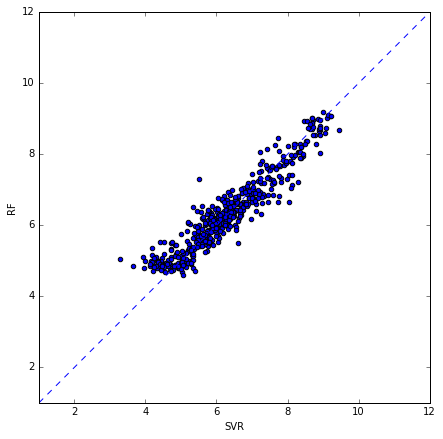

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

from scipy.stats import pearsonr

plt.rcParams["figure.figsize"] = [7, 7]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

print('Pearson correlation:', pearsonr(predictions_svr.ic50_predicted, predictions_rf.ic50_predicted)[0])

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')
plt.scatter(
    predictions_svr.ic50_predicted
    , predictions_rf.ic50_predicted
    , c='blue'
    , s=20
)
plt.xlabel('SVR')
plt.ylabel('RF')

In [6]:
threshold = MAX_ERROR

diffs_rf = ((predictions_rf.ic50_predicted_nM - predictions_rf.ic50_true_nM).abs() < threshold).tolist()
accurate_rf = predictions_rf[diffs_rf]

diffs_svr = ((predictions_svr.ic50_predicted_nM - predictions_svr.ic50_true_nM).abs() < threshold).tolist()
accurate_svr = predictions_svr[diffs_svr]

print(accurate_rf.shape, accurate_svr.shape)

(314, 4) (293, 4)


In [7]:
from pandas import merge

accurate_all = merge(accurate_rf, accurate_svr, suffixes=('_rf', '_svr'), left_index=True, right_index=True, how='inner')
print(accurate_all.shape)
accurate_all.head()

(276, 8)


,ic50_predicted_rf,ic50_true_rf,ic50_predicted_nM_rf,ic50_true_nM_rf,ic50_predicted_svr,ic50_true_svr,ic50_predicted_nM_svr,ic50_true_nM_svr
smiles,,,,,,,,
CCc1c(O)ccc2c1O[C@H](c1ccc(OCCN3CCCCC3)cc1)[C@H](c1ccc(O)cc1)S2,7.952289,8.327902,11.161194,4.7,7.867606,8.327902,13.564205,4.7
Oc1ccc2nc(-c3ccc(O)c(F)c3)cc(Cl)c2c1,6.481460,6.609065,330.019873,246.0,6.004725,6.609065,989.178529,246.0
Cc1nc(CN2CCN(c3nc(NCCc4ccc(O)cc4)nc(N(C)CCCc4ccc(Cl)cc4)n3)CC2)cs1,7.190932,6.823909,64.427056,150.0,6.885006,6.823909,130.314751,150.0
Oc1ccc([C@H]2Sc3cc(O)ccc3S[C@H]2c2ccc(OCCN3CCCC3)c(Br)c2)cc1,8.717648,8.397940,1.915807,4.0,8.679498,8.397940,2.091714,4.0
O=C1c2c(Cl)cc(O)cc2O[C@H](c2ccc(OCCN3CCCCC3)cc2)[C@@H]1c1ccc(O)cc1,7.565931,7.236572,27.168740,58.0,7.472004,7.236572,33.728433,58.0


Agreement up to 200 nM:  0.768115942029


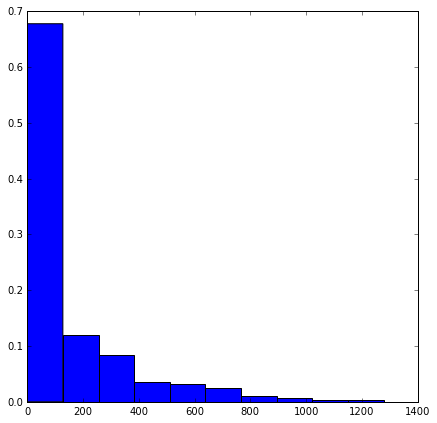

In [8]:
import numpy as np

differences = []
for x, y in zip(accurate_all.ic50_predicted_nM_rf, accurate_all.ic50_predicted_nM_svr):
    differences.append(abs(x - y))
differences = np.array(differences)
print('Agreement up to 200 nM: ', sum(differences < 200) / len(differences))
weights = np.ones_like(differences) / len(differences)
plt.hist(differences, weights=weights)
plt.show()